Probability Distributions Exercises

In [4]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

- What is the probability that no cars drive up in the noon hour?
- What is the probability that 3 or more cars come through the drive through?
- How likely is it that the drive through gets at least 1 car?

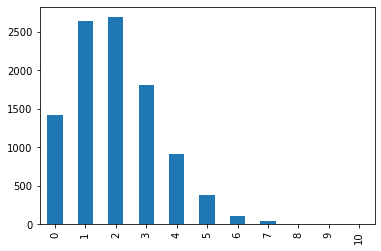

In [5]:
pd.Series(stats.poisson(2).rvs(10_000)).value_counts().sort_index().plot.bar()
plt.show()

In [6]:
#1a - probability that no cars will drive up
stats.poisson(2).pmf(0)

0.1353352832366127

In [7]:
#1b - probability that 3 or more cars drive through
stats.poisson(2).sf(2)

0.32332358381693654

In [8]:
#1c - probability that at least 1 car drives through
stats.poisson(2).sf(0)

0.8646647167633873

In [144]:
#simulation for #1a
cars1 = np.random.poisson(2, size=10000)
success = cars1 == 0
success.mean()

0.1358

In [146]:
#simulation for #1b
cars2 = np.random.poisson(2, size=10000)
success2 = cars2 >= 3
success2.mean()

0.3205

In [147]:
#simuation for #1c
cars3 = np.random.poisson(2, size=10000)
success3 = cars3 >=1
success3.mean()

0.8647

---

2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

- What grade point average is required to be in the top 5% of the graduating class?
- What GPA constitutes the bottom 15% of the class?
- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class.
- Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
- If I have a GPA of 3.5, what percentile am I in?

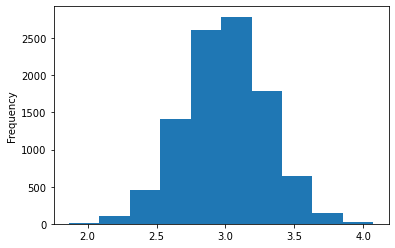

In [23]:
#plot for #2
pd.Series(stats.norm(3.0, .3).rvs(10000)).plot.hist()
plt.show()

In [24]:
#2a - gpa required to be in the top 5%
stats.norm(3.0, .3).isf(.05)

3.4934560880854417

In [25]:
#2b - gpa for bottom 15% of the class
stats.norm(3.0, .3).ppf(.15)

2.689069983151863

In [27]:
#2c - students in the third decile (values split into ten even groups) from the bottom of the class
stats.norm(3.0, .3).isf(.8)
#min in third decile

2.7475136299281258

In [28]:
stats.norm(3.0, .3).ppf(.3)
#max in third decile

2.842679846187588

In [30]:
#Would a 2.8 gpa qualify for the scholarship?
min_gpa_third_decile = stats.norm(3.0, .3).isf(.8)
max_gpa_third_decile = stats.norm(3.0, .3).ppf(.3)
gpa = 2.8

min_gpa_third_decile < gpa < max_gpa_third_decile

True

In [31]:
#2d - what percentile is a 3.5 gpa in?
stats.norm(3.0, .3).cdf(3.5)

0.9522096477271853

In [99]:
#simulation for #2a
gpa_dist = np.random.normal(loc=3.0, scale=.3, size=10000)
np.percentile(gpa_dist, 95)

3.495323835392417

In [101]:
#simulation for 2b
np.percentile(gpa_dist, 15)

2.6915429383131104

In [102]:
#simulation for 2c
x = 2.8
(np.percentile(gpa_dist, 20)) < x < (np.percentile(gpa_dist, 30))

True

In [148]:
#simulation for 2d
call_gpa = 3.5
(call_gpa > gpa_dist).mean()

0.9519

---

3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [34]:
#3 - how likely is this many people or more clickthrough
p_clickthrough = .02
clickthroughs_observ = 4326

stats.binom(clickthroughs_observ, p_clickthrough).sf(96)

0.13975823631416445

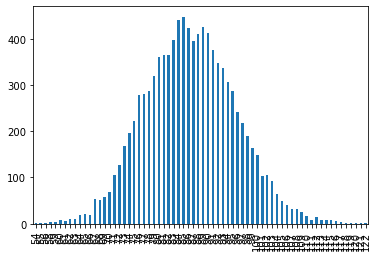

In [36]:
# plot for #3
pd.Series(stats.binom(clickthroughs_observ, p_clickthrough).rvs(10_000)).value_counts().sort_index().plot.bar()
plt.show()

In [167]:
#simulation for #3
sims = np.random.choice([True, False], p=[.02, .98], size=(10000, 4326))
x = sims.sum(axis=1) >= 97
x.mean()

0.1382

---

4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

- What is the probability that at least one of your first 60 answers is correct?


In [39]:
#4 - what is the probability of 1 in 60 correct
p_value = .01
n_trials = 60

stats.binom(n_trials, p_value).sf(0)

0.45284335760923855

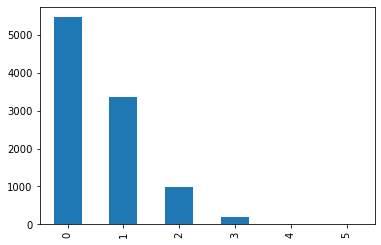

In [40]:
#plot for #4
pd.Series(stats.binom(n_trials, p_value).rvs(10000)).value_counts().sort_index().plot.bar()
plt.show()

In [127]:
#simulation for #4
homework_sims = np.random.choice([True, False], p=[.01, .99], size=(10000, 60))
correct = homework_sims.sum(axis=1) > 0
correct.mean()

0.4545

---

5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [44]:
#5a - probability it gets cleaned each day
p_value = .03
n_trials = 59 #90% of 66 students rounded

stats.binom(n_trials, p_value).sf(0)

0.8342199288437352

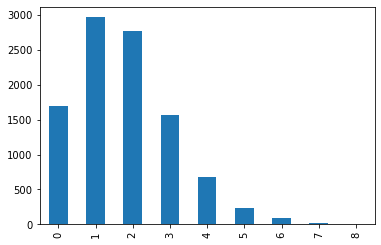

In [46]:
#plot for #5a
pd.Series(stats.binom(n_trials, p_value).rvs(10000)).value_counts().sort_index().plot.bar()
plt.show()

In [48]:
#5b - not cleaned for two days
two_day_p_value = .03
two_day_n_trials = 118 #90% of 66 students rounded * 2 for 2 days

stats.binom(two_day_n_trials, two_day_p_value).pmf(0)

0.027483031992576134

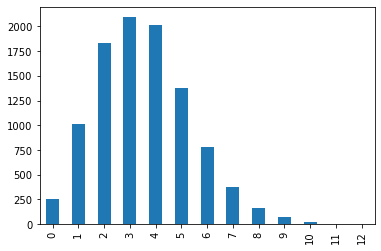

In [49]:
#plot for 5b
pd.Series(stats.binom(two_day_n_trials, two_day_p_value).rvs(10000)).value_counts().sort_index().plot.bar()
plt.show()

In [52]:
#5c - all week no cleaning
week_p_value = .03
week_n_trials = 295 #90% of 66 students rounded * 5 days (all week)

stats.binom(week_n_trials, week_p_value).pmf(0)

0.00012521651388091245

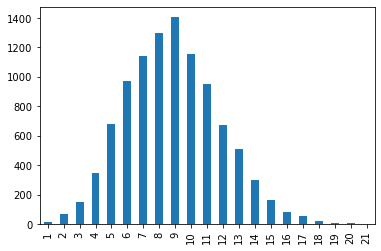

In [53]:
#plot for 5c
pd.Series(stats.binom(week_n_trials, week_p_value).rvs(10000)).value_counts().sort_index().plot.bar()
plt.show()

In [161]:
#simulations for #5a
student_cleans = np.random.binomial(59, .03, size=(10000))
#student_cleans
success = student_cleans >=1
success.mean()

0.8318

In [137]:
#simulation for #5b
student_clean = np.random.binomial(118, .03, size=(10000))
clean_fail = student_clean < 1
clean_fail.mean()

0.0279

In [142]:
#simulation for #5c
stud_clean = np.random.binomial(295, .03, size=10000)
clean_success = stud_clean < 1
clean_success.mean()

0.0002

---

6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [54]:
#6 - 

#17 people in line in front (17 people orders = 2min * 17people = 34 minutes + 10 minutes wait for food = 44 minutes 
# -- leaving 16 minutes to eat)
line_mean = 15
line_sd = 3

stats.norm(line_mean, line_sd).cdf(17)


0.7475074624530771

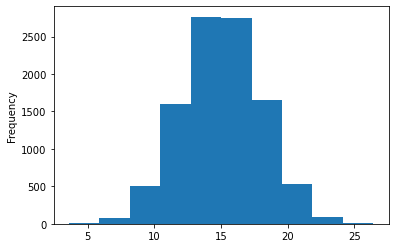

In [55]:
#plot for #6
pd.Series(stats.norm(line_mean, line_sd).rvs(10000)).plot.hist()
plt.show()

In [162]:
#simulation for #6
line_size = np.random.normal(15, 3, size=10000)
success = line_size <= 17
success.mean()

0.7459

---

7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

- What percent of employees earn less than 60,000?
- What percent of employees earn more than 95,000?
- What percent of employees earn between 65,000 and 80,000?
- What do the top 5% of employees make?

In [56]:
from env import get_db_url

In [63]:
salaries = pd.read_sql('SELECT * FROM salaries;', get_db_url('employees'))

In [64]:
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25


In [65]:
current_salaries = pd.read_sql('SELECT salary FROM salaries WHERE to_date > NOW();', get_db_url('employees'))

In [66]:
current_salaries.head()

,salary
0,88958
1,72527
2,43311
3,74057
4,94692


In [68]:
current_salaries.shape


(240124, 1)

In [70]:
#mean of salaries for current employees
cs_mean = current_salaries.mean()
cs_mean

salary    72012.235857
dtype: float64

In [72]:
#standard deviation of current salaries
cs_sd = current_salaries.std()
cs_sd

salary    17309.99538
dtype: float64

---

In [75]:
#7a - percent of employees that earn less than 60,000 (normal distribution)
stats.norm(cs_mean, cs_sd).cdf(60001) 

array([0.24387554])

In [80]:
#actual employees below 60,000
less_than_60 = current_salaries < 60000
less_than_60.head()

,salary
0,False
1,False
2,True
3,False
4,False


In [84]:
#actual percentage below 60,000
np.average(less_than_60)

0.2705727041028802

---

In [76]:
#7b - percent of employees that earn more than 95,000 (normal distribution)
stats.norm(cs_mean, cs_sd).sf(95000) 

array([0.09208819])

In [85]:
#employees that make more than 95,000 (actual)
more_than_95 = current_salaries > 95000
more_than_95.head()

,salary
0,False
1,False
2,False
3,False
4,False


In [86]:
#percent of employees that make above 95,000 (actual)
np.average(more_than_95)

0.1086272092752078

---

In [150]:
#7c - percent of employees that earn between 65,000 and 80,000 (normal distribution)
sal_above_65 = stats.norm(cs_mean, cs_sd).sf(65000)
sal_above_80 = stats.norm(cs_mean, cs_sd).sf(80000)

sal_between = sal_above_65 - sal_above_80
sal_between.mean()

0.3350605685446666

In [169]:
#percent of employees that earn between 65,000 and 80,000 (actual)
sal_between_65_80 = (current_salaries > 65000) & (current_salaries < 80000)
sal_between_65_80.mean()

salary    0.325107
dtype: float64

---

In [78]:
#7d - salaries in top 5% (normal distribution)
stats.norm(cs_mean, cs_sd).isf(.05) 

array([100484.64454103])

In [87]:
#salary cut off for top 5% (actual)
np.percentile(current_salaries, 95)

104225.84999999998

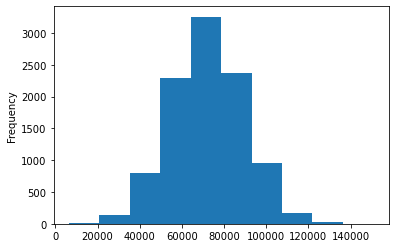

In [154]:
#plot for #7 model
pd.Series(stats.norm(cs_mean, cs_sd).rvs(10000)).plot.hist()
plt.show()

<AxesSubplot:ylabel='Frequency'>

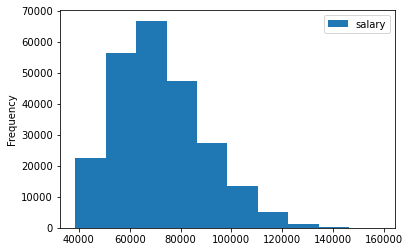

In [170]:
#plot for actual data from database
current_salaries.plot.hist()